In [27]:
import pandas as pd

# Full path to the file inside the folder
file_path = 'heart/heart_disease_uci.csv'

try:
    df = pd.read_csv(file_path)
    print(df.head())
    
except FileNotFoundError:
    print("File was not found.Please check the file path.")
except pd.errors.EmptyDataError:
    print("File is empty. Please check the file content.")
except pd.errors.ParserError:
    print("Error parsing data. Please check the file format.")


   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


In [1]:
import pandas as pd

#locating file path
file_path = 'heart/heart_disease_uci.csv'
df = pd.read_csv(file_path)

#Reading a the heart disease dataset
print(f"UCI Heart Disease Dataset:\n")
print(df.head(20))

#finding missing values before cleaning
print("Missing values before cleaning:\n")
print(df.isnull().sum())

# Drop columns with too many missing values eg.thal,ca,slope
df = df.drop(columns=['ca', 'thal','slope'])

# Fill  empty numeric columns with median
for col in ['trestbps', 'chol', 'thalch', 'oldpeak']:
    df[col] = df[col].fillna(df[col].median())

# Fill  empty categorical columns with mode
for col in ['exang', 'restecg', 'fbs']:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values after cleaning:\n")
print(df.isnull().sum())

# Optional: preview the cleaned dataset
print("\nPreview of cleaned dataset:\n")
print(df.head())






UCI Heart Disease Dataset:

    id  age     sex    dataset               cp  trestbps   chol    fbs  \
0    1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1    2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2    3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3    4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4    5   41  Female  Cleveland  atypical angina     130.0  204.0  False   
5    6   56    Male  Cleveland  atypical angina     120.0  236.0  False   
6    7   62  Female  Cleveland     asymptomatic     140.0  268.0  False   
7    8   57  Female  Cleveland     asymptomatic     120.0  354.0  False   
8    9   63    Male  Cleveland     asymptomatic     130.0  254.0  False   
9   10   53    Male  Cleveland     asymptomatic     140.0  203.0   True   
10  11   57    Male  Cleveland     asymptomatic     140.0  192.0  False   
11  12   56  Female  Cleveland  atypical angina     140.0  294.0  False 

C:\Users\user\AppData\Local\Temp\ipykernel_10008\2561596876.py:24: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


Total patients with heart disease:920
Average age of patients:53.51
Statistical summary of numerical columns:

               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  920.000000  920.000000  920.000000  920.000000   
mean   460.500000   53.510870  131.995652  199.908696  137.692391    0.853261   
std    265.725422    9.424685   18.451300  109.040171   25.145235    1.058049   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  177.750000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  267.000000  156.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

              num  
count  920.000000  
mean     0.995652  
std      1.142693  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  

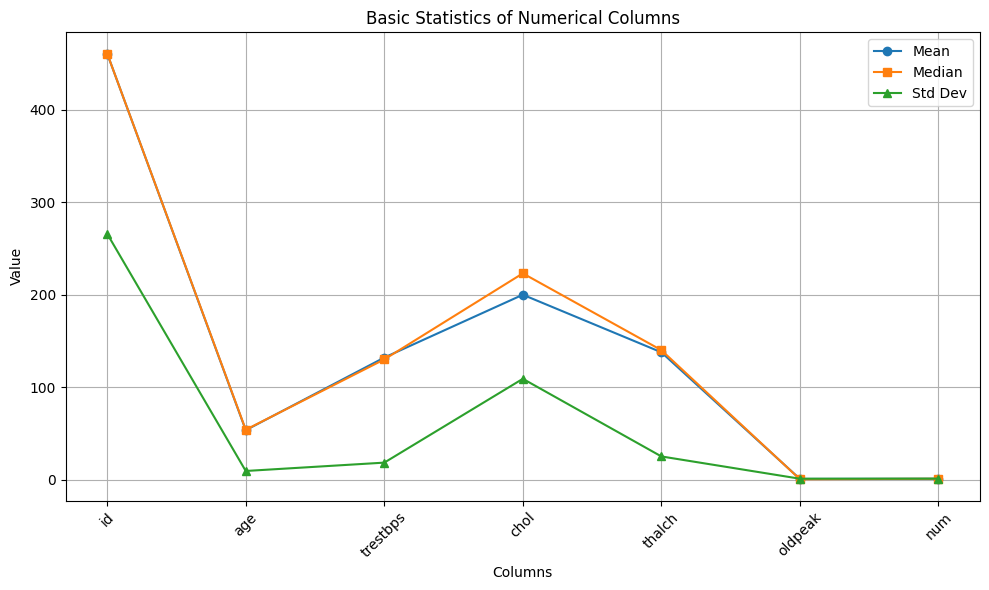

Average cholesterol:

sex
Female    240.814433
Male      188.977961
Name: chol, dtype: float64
Avereage chest pain type:

sex     cp             
Female  asymptomatic       235.200000
        atypical angina    248.704918
        non-anginal        244.792453
        typical angina     210.900000
Male    asymptomatic       180.368545
        atypical angina    224.884956
        non-anginal        182.337748
        typical angina     206.000000
Name: chol, dtype: float64


In [12]:
import numpy as np
print(f"Total patients with heart disease:{len(df)}")

print(f"Average age of patients:{df['age'].mean():.2f}")
#Computing statistical numerical columns eg median,mean,std
basic_stats = df.describe()
print("Statistical summary of numerical columns:\n")
print(basic_stats)
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
#file_path = 'hear.csv/heart_disease_uci.csv'
#df = pd.read_csv(file_path)

# Quick clean
df = df.fillna(df.median(numeric_only=True))

# Compute basic stats
basic_stats = df.describe()
print("Statistical summary of numerical columns:\n")
print(basic_stats)

# --- Plot mean, median (50%), and std as line graph ---
plt.figure(figsize=(10,6))

# Plot rows from describe()
plt.plot(basic_stats.columns, basic_stats.loc['mean'], marker='o', label='Mean')
plt.plot(basic_stats.columns, basic_stats.loc['50%'], marker='s', label='Median')
plt.plot(basic_stats.columns, basic_stats.loc['std'], marker='^', label='Std Dev')

plt.title("Basic Statistics of Numerical Columns")
plt.xlabel("Columns")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Grouping: Average cholesterol by sex 
chol_by_sex = df.groupby('sex')['chol'].mean()

# Grouping: Average chestpain by sex  (cp)
chol_by_sex_cp = df.groupby(['sex', 'cp'])['chol'].mean()

print("Average cholesterol:\n")
print(chol_by_sex)
print("Avereage chest pain type:\n")
print(chol_by_sex_cp)



Total patients with heart disease:920
Average age of patients:53.51


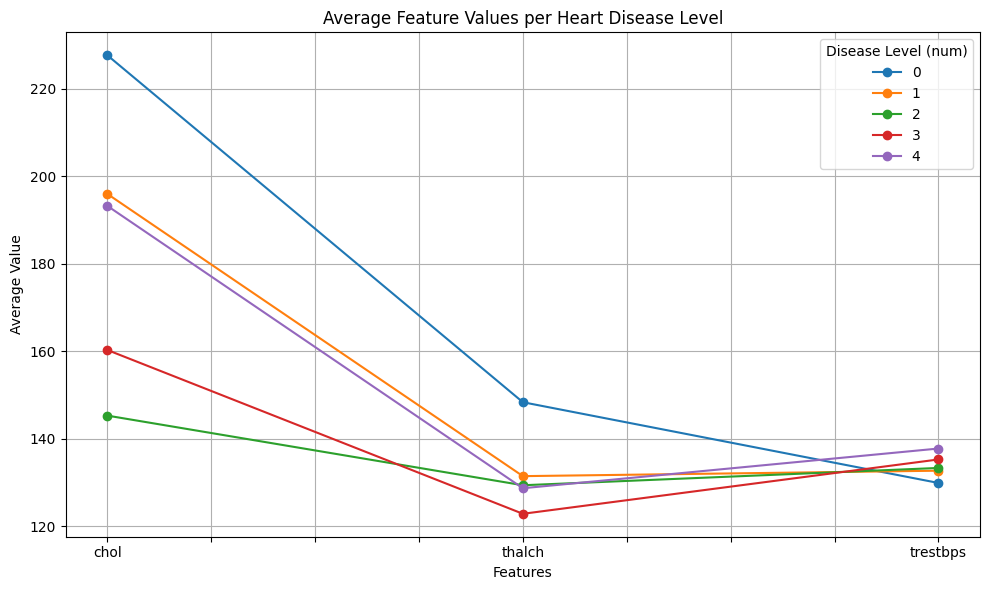

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
#Knowing the environment
print(f"Total patients with heart disease:{len(df)}")

print(f"Average age of patients:{df['age'].mean():.2f}")



df = df.fillna(df.median(numeric_only=True))

# Features we care about
features = ['chol', 'thalch', 'trestbps']

# Group by disease presence
group_means = df.groupby('num')[features].mean()

# Plot
group_means.T.plot(kind='line', marker='o', figsize=(10,6))
plt.title("Average Feature Values per Heart Disease Level")
plt.xlabel("Features")
plt.ylabel("Average Value")
plt.grid(True)
plt.legend(title="Disease Level (num)")
plt.tight_layout()
plt.show()



Mean, Std, Median of selected columns:

                Mean     Std Dev  Median
chol      199.908696  109.040171   223.0
fbs         0.150000    0.357266     0.0
thalch    137.692391   25.145235   140.0
trestbps  131.995652   18.451300   130.0


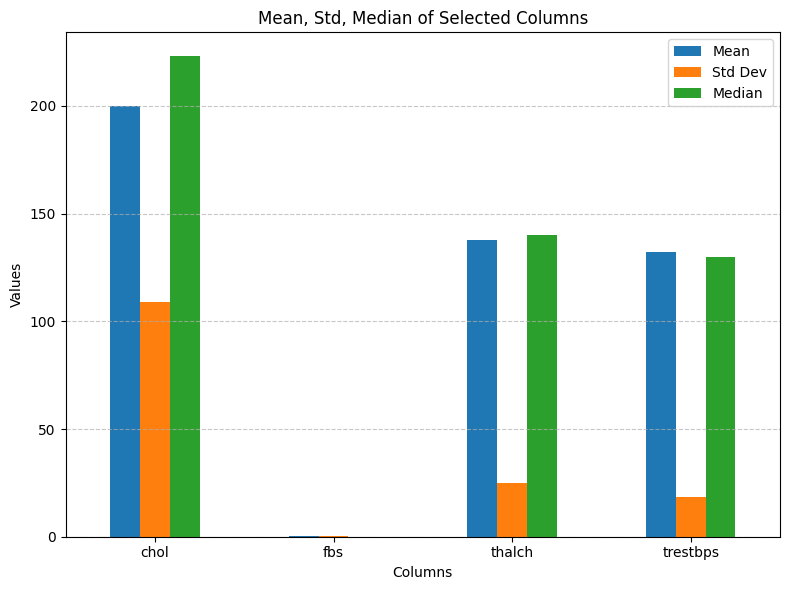

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Fill missing values with median for numeric columns
df = df.fillna(df.median(numeric_only=True))

# Select columns
cols = ['chol', 'fbs', 'thalch', 'trestbps']

# Compute mean, std, median
stats = pd.DataFrame({
    'Mean': df[cols].mean(),
    'Std Dev': df[cols].std(),
    'Median': df[cols].median()
})

print("Mean, Std, Median of selected columns:\n")
print(stats)

# --- Grouped Bar Chart ---
stats.plot(kind='bar', figsize=(8,6))
plt.title("Mean, Std, Median of Selected Columns")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
#Grouping: Average cholesterol by sex 
chol_by_sex = df.groupby('sex')['chol'].mean()

# Grouping: Average chestpain by sex  (cp)
chol_by_sex_cp = df.groupby(['sex', 'cp'])['chol'].mean()

print("Average cholesterol:\n")
print(chol_by_sex)
print("Avereage chest pain type:\n")
print(chol_by_sex_cp)

Average cholesterol:

sex
Female    240.814433
Male      188.977961
Name: chol, dtype: float64


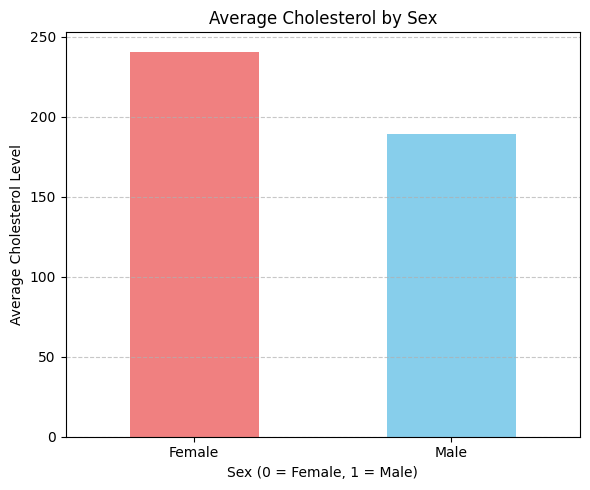

In [22]:
# Compute average cholesterol by sex
chol_by_sex = df.groupby('sex')['chol'].mean()
print("Average cholesterol:\n")
print(chol_by_sex)

# Bar chart
plt.figure(figsize=(6,5))
chol_by_sex.plot(kind='bar', color=['lightcoral', 'skyblue'])

plt.title("Average Cholesterol by Sex")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Average Cholesterol Level")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Cholestrol is the main factor of heart disease


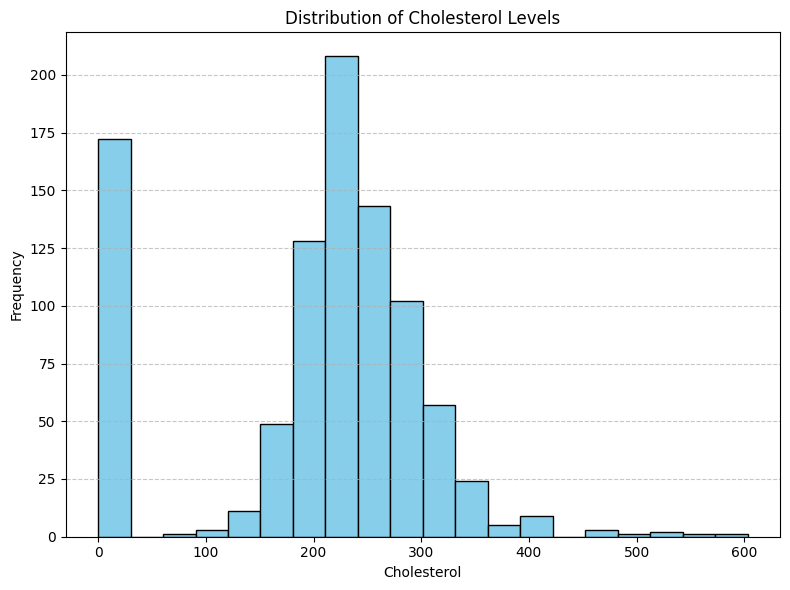

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

print(f"Cholestrol is the main factor of heart disease")

df = df.fillna(df.median(numeric_only=True))

# Histogram of cholesterol
plt.figure(figsize=(8,6))
plt.hist(df['chol'], bins=20, color='skyblue', edgecolor='black')

plt.title("Distribution of Cholesterol Levels")
plt.xlabel("Cholesterol")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print(f"How chlostrol tends to increase with age")


df = df.fillna(df.median(numeric_only=True))

# Scatter plot using seaborn
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='age', y='chol', hue='num', palette='Set1', alpha=0.7, edgecolor='k')

plt.title("Age vs Cholesterol (Colored by Heart Disease Level)")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.legend(title="Disease Level (num)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


KeyboardInterrupt: 